<a href="https://colab.research.google.com/github/A1171/ColabNotebooks/blob/main/%D0%97%D0%B0%D0%B4%D0%B0%D0%BD%D0%B8%D0%B5_%D0%B8%D0%B7_%D0%BE%D0%B1%D1%83%D1%87%D0%B5%D0%BD%D0%B8%D1%8F_%D0%91%D0%B0%D0%B7%D0%BE%D0%B2%D1%8B%D0%B9_%D0%B1%D0%BB%D0%BE%D0%BA_%7C_%D0%A0%D0%B5%D1%88%D0%B5%D0%BD%D0%B8%D0%B5_%D0%B7%D0%B0%D0%B4%D0%B0%D1%87%D0%B8_%D1%80%D0%B5%D0%B3%D1%80%D0%B5%D1%81%D1%81%D0%B8%D0%B8_%D1%81_%D0%BF%D0%BE%D0%BC%D0%BE%D1%89%D1%8C%D1%8E_%D0%BD%D0%B5%D0%B9%D1%80%D0%BE%D0%BD%D0%BD%D1%8B%D1%85_%D1%81%D0%B5%D1%82%D0%B5%D0%B9_%7C_%D0%94%D0%97_Ultra_Pro_%7C_%D0%A3%D0%98%D0%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

По базе машин с ЮЛЫ данным обучите модель для предсказания цен на машины.

1. Создайте обучающую, тестовую и проверочную выборки. 

2. Оцените качество работы созданной сети, определив средний процент ошибки на проверочной выборке. (Для этого потребуется привести предсказанные моделью значения к первоначальному диапазону цен.)  

3. Подсчитайте ошибку на каждом примере тестовой выборки и суммарный процент ошибки.


Рекомендации:
- в качестве ошибки рекомендуется использовать среднеквадратическую ошибку (mse).
- метрику для данной задачи можно не использовать.
- последний слой модели должен иметь 1 нейрон.
- суммарный процент ошибки = средний модуль ошибки (MAE) / среднюю цену машины. Например, если средняя цена машины 560.000 р, а средняя ошибка 56.000р, то процент ошибки равен 10%.


In [ ]:
# Загрузка датафрейма из google облака
import gdown

gdown.download('https://storage.googleapis.com/datasets_ai/Base/10_regression/cars_new.csv', None, quiet=True)

'cars_new.csv'

In [ ]:
import numpy as np 
import pandas as pd
from tensorflow.keras import utils
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, SpatialDropout1D, BatchNormalization, Embedding, Flatten, Activation, Input, concatenate
from tensorflow.keras.layers import SimpleRNN, GRU, LSTM, Bidirectional, Conv1D, MaxPooling1D, GlobalMaxPooling1D
from tensorflow.keras.optimizers import Adam, Adadelta, SGD, Adagrad, RMSprop
from tensorflow.keras.preprocessing.text import Tokenizer
from sklearn.preprocessing import StandardScaler
import gdown
import re
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
%matplotlib inline

In [ ]:
import pandas as pd 
df = pd.read_csv('cars_new.csv', sep=',', header=0, index_col=0) # Загружаем базу #, encoding= 'cp1251'
df.head(40)

,model,price,year,mileage,body,kpp,fuel,volume,power
mark,,,,,,,,,
kia,cerato,996000,2018,28000,седан,автомат,бензин,2.0,150.0
daewoo,nexia 1 поколение [2-й рестайлинг],140200,2012,60500,седан,механика,бензин,1.5,80.0
suzuki,jimny 3 поколение [рестайлинг],750000,2011,29000,внедорожник,автомат,бензин,1.3,85.0
bmw,x1 18 e84 [рестайлинг],970000,2014,49500,кроссовер,автомат,бензин,2.0,150.0
chevrolet,lacetti 1 поколение,205000,2007,151445,седан,механика,бензин,1.4,95.0
hyundai,creta 1 поколение,985000,2016,34067,кроссовер,автомат,бензин,2.0,150.0
kia,ceed 2 поколение,589000,2013,98000,хетчбэк,автомат,бензин,1.6,129.0
toyota,corolla e140,500000,2008,141000,седан,автомат,бензин,1.6,124.0
mercedes-benz,c-класс 180 w204/s204/c204 [рестайлинг],1320000,2015,81112,седан,автомат,бензин,1.6,156.0


In [ ]:
data_text = df['model'].values #

len(data_text) # 

70119

In [ ]:
df.keys()

Index(['model', 'price', 'year', 'mileage', 'body', 'kpp', 'fuel', 'volume',
       'power'],
      dtype='object')

In [ ]:
# Список кузовов
body_class = [0, 
              {'внедорожник'          : 0,
               'кроссовер' : 1,
               'седан'     : 2,
               'хетчбэк'    : 3,
               'универсал' : 4,
               'минивэн'          : 5,
               'лифтбэк'       : 6,
               'купе'            : 7,
               'микроавтобус'          : 8,
               'пикап'  : 9,
               'кабриолет'             : 10,
               'хардтоп'      : 11,
               'родстер'           : 12,
               'тарга'         : 13,
               'лимузин'       : 14,
               'фастбэк'       : 15,
               'другой'   : 16
              }]

проверяем что все перечисления выбрали. Описание будем прогонять через анализатор текста.

In [ ]:
df1=df[df['body']!='внедорожник']
df2=df1[df1['body']!='кроссовер']
df3=df2[df2['body']!='седан']
df4=df3[df3['body']!='хетчбэк']
df5=df4[df4['body']!='универсал']
df6=df5[df5['body']!='минивэн']
df7=df6[df6['body']!='лифтбэк']
df8=df7[df7['body']!='купе']
df9=df8[df8['body']!='микроавтобус']
df10=df9[df9['body']!='пикап']
df11=df10[df10['body']!='кабриолет']
df12=df11[df11['body']!='хардтоп']
df13=df12[df12['body']!='родстер']
df14=df13[df13['body']!='тарга']
df15=df14[df14['body']!='лимузин']
df16=df15[df15['body']!='фастбэк']
df16


,model,price,year,mileage,body,kpp,fuel,volume,power
mark,,,,,,,,,
volkswagen,golf,325000,2005,140000,NaN,автомат,бензин,1.6,102.0
mitsubishi,lancer,268000,2005,121000,NaN,механика,бензин,1.6,98.0
audi,a5 8t [рестайлинг],949900,2013,119000,NaN,автомат,бензин,2.0,211.0


In [ ]:
# Список топлива
fuel_class = [0, 
              {'бензин'          : 1,
               'дизель' : 2,
               'гибрид'     : 3,
               'электро'    : 4,
               'газ' : 5,
               'другой'   : 6
              }]

In [ ]:
df1=df[df['fuel']!='бензин']
df2=df1[df1['fuel']!='дизель']
df3=df2[df2['fuel']!='гибрид']
df4=df3[df3['fuel']!='электро']
df5=df4[df4['fuel']!='газ']
df5

,model,price,year,mileage,body,kpp,fuel,volume,power
mark,,,,,,,,,


In [ ]:
# Список кпп
kpp_class = [0, 
              {'автомат'          : 1,
               'механика' : 2,
               'робот'     : 3,
               'вариатор'    : 4,
               'другой'   : 5
              }]

In [ ]:
df1=df[df['kpp']!='автомат']
df2=df1[df1['kpp']!='механика']
df3=df2[df2['kpp']!='робот']
df4=df3[df3['kpp']!='вариатор']
df4

,model,price,year,mileage,body,kpp,fuel,volume,power
mark,,,,,,,,,
skoda,yeti 1 поколение,675000,2012,96472,кроссовер,NaN,бензин,1.2,105.0
ford,focus 3 поколение,529000,2012,59000,универсал,NaN,бензин,1.6,105.0
volkswagen,passat b6,499000,2006,156000,седан,NaN,бензин,2.0,140.0
ford,fiesta 6 поколение [рестайлинг],589000,2016,57000,седан,NaN,бензин,1.6,105.0


Рекруссия чтобы получить из ключа все марки

In [ ]:
def GetEnum(dfx,List1):
  List1.append(dfx[0])
  print(dfx[0])
  if(len(dfx[dfx!=dfx[0]].values)>0 and dfx[dfx!=dfx[0]][0]!=''):
    GetEnum(dfx[dfx!=dfx[0]],List1)
  return List1

In [ ]:
EmptyList=[]

print(GetEnum(df.index,EmptyList))

kia
daewoo
suzuki
bmw
chevrolet
hyundai
toyota
mercedes-benz
chery
ford
mazda
peugeot
volkswagen
audi
mitsubishi
opel
nissan
skoda
subaru
honda
renault
['kia', 'daewoo', 'suzuki', 'bmw', 'chevrolet', 'hyundai', 'toyota', 'mercedes-benz', 'chery', 'ford', 'mazda', 'peugeot', 'volkswagen', 'audi', 'mitsubishi', 'opel', 'nissan', 'skoda', 'subaru', 'honda', 'renault']


In [ ]:
# Список марок
mark_class = [0, 
              {'kia' : 1, 
               'daewoo' : 2, 
               'suzuki' : 3, 
               'bmw' : 4, 
               'chevrolet' : 5, 
               'hyundai' : 6, 
               'toyota' : 7, 
               'mercedes-benz' : 8, 
               'chery' : 9, 
               'ford' : 10, 
               'mazda' : 11, 
               'peugeot' : 12, 
               'volkswagen' : 13, 
               'audi' : 14, 
               'mitsubishi' : 15, 
               'opel' : 16, 
               'nissan' : 17, 
               'skoda' : 18, 
               'subaru' : 19, 
               'honda' : 20, 
               'renault' : 21,
               'другой'   : 22
              }]

In [ ]:
# Вычисление счетчиков для данных разбиения
for class_desc in [body_class,
                   fuel_class,
                   kpp_class,
                   mark_class]:
    if isinstance(class_desc[1], list):
        class_desc[0] = len(class_desc[1]) + 1
    else:
        class_desc[0] = max(class_desc[1].values()) + 1

In [ ]:
mark_class

[23,
 {'audi': 14,
  'bmw': 4,
  'chery': 9,
  'chevrolet': 5,
  'daewoo': 2,
  'ford': 10,
  'honda': 20,
  'hyundai': 6,
  'kia': 1,
  'mazda': 11,
  'mercedes-benz': 8,
  'mitsubishi': 15,
  'nissan': 17,
  'opel': 16,
  'peugeot': 12,
  'renault': 21,
  'skoda': 18,
  'subaru': 19,
  'suzuki': 3,
  'toyota': 7,
  'volkswagen': 13,
  'другой': 22}]

In [ ]:
def int_to_ohe(arg, class_list):
  
    # Определение размерности выходного вектора
    num_classes = class_list[0]

    # Поиск верного интервала для входного значения
    for i in range(num_classes - 1):
        if arg == class_list[1][i]:
            cls = i                       # Интервал найден - назначение класса
            break
    else:                                 # Внимание: for/else
        cls = num_classes - 1             # Интервал не найден - последний класс

    # Возврат в виде one hot encoding-вектора
    return utils.to_categorical(cls, num_classes)

In [ ]:
# Преобразование данных о кузове и в one hot encoding
# Преобразование данных о кпп и в one hot encoding
# Преобразование данных о топливе и в one hot encoding
# Преобразование данных о марке и в one hot encoding
def extract_to_ohe(enum,arg):
    # Определение размерности выходного вектора
    num_classes = enum[0]

    # Разбивка на слова
    #split_array = re.split(r'[ ,.:()?!]', arg)

    # Поиск в строке и присвоение класса
    #for word in split_array:
    cls = enum[1].get(arg, -1)
    if cls < 0:
        cls = num_classes - 1

    # Возврат в виде one hot encoding-вектора
    return utils.to_categorical(cls, num_classes)

In [ ]:
def year_to_ohe(arg):
  num_classes = 2025-1980
  year=0
  if(arg>=1980):
    year=arg-1980
  else:
    year=1
  return utils.to_categorical(year, num_classes)

In [ ]:
ModelKey=df.columns.get_loc('model')
PriceKey=df.columns.get_loc('price')
YearKey=df.columns.get_loc('year')
PathKey=df.columns.get_loc('mileage')
BodyKey=df.columns.get_loc('body')
KPPKey=df.columns.get_loc('kpp')
FuelKey=df.columns.get_loc('fuel')
VolumeKey=df.columns.get_loc('volume')
PowerKey=df.columns.get_loc('power')

In [ ]:
def extract_row_data(row):
  
    # Извлечение и преобразование данных
    #print(row[YearKey])
    year = year_to_ohe(row[YearKey])
    Path = np.array(row[PathKey])                      
    body = extract_to_ohe(body_class,row[BodyKey])                  
    kpp = extract_to_ohe(kpp_class,row[KPPKey])       
    fuel = extract_to_ohe(fuel_class,row[KPPKey])
    Volume = np.array(row[VolumeKey])
    Power = np.array(row[PowerKey])
    #Mark = np.array(row.index)
    Price = np.array(row[PriceKey]) 
    # Объединение всех входных данных в один общий вектор
    x_data = np.hstack([year,
                        Path, 
                        body,
                        kpp,
                        fuel,
                        Volume,
                        Power])
    #print
    # Возврат входных данных и выходных (зарплаты)
    return x_data, Price


# Создание общей выборки
def construct_train_data(row_list):
    x_data = []
    y_data = []
    
    for row in row_list:
        x, y = extract_row_data(row)
        
        #print(y)
        if y > 0:                      # Данные добавляются, только если есть зарплата [0]
            x_data.append(x)
            y_data.append(y)

    return np.array(x_data), np.array(y_data)

In [ ]:
np.array(df.values[0][PriceKey])

array(996000)

In [ ]:
# Формирование выборки из загруженного набора данных    
x_train_01, y_train = construct_train_data(df.values)

In [ ]:
print(x_train_01.shape)
print(y_train.shape)

(70119, 78)
(70119,)


In [ ]:
#Марку обрабатываем отдельно index в общей куче сразу не запихался, проще отдельно обработку дописать
mark = np.array(df[df['price']>0].index)
markList=[]
for m in mark:
  markList.append(extract_to_ohe(mark_class,m))
markList=np.array(markList)
print(np.shape(markList))

(70119, 23)


In [ ]:
#Склеиваем
x_train_01=np.hstack((x_train_01,markList))
print(x_train_01.shape)

(70119, 101)


In [ ]:
print(y_train[:100])

[ 996000  140200  750000  970000  205000  985000  589000  500000 1320000
  270000  290000  295000  250000  473936  650000  220000  165000  280000
  250000   80000   90000  250000  505000  155000  180000  150000  260000
  260000  150000  394500  644000  280000  730000   29000 1550000  899999
  280000  899000  220000  250000   80000  440000  650000  480000  545000
  720000  115000  480000  539000 1099990   65000 1155000  550000  420000
  600000 1100000 1100000  309000  422222  400000  470000 1915000  100000
  830000 1102500  380000  100000 1365000  110000  340000   75000  919000
  670000  150000  510000 1459999  260000  160000  430000  445000  425000
 1115000  150000   50000  160000  220000  110000  250000   75000 1150000
   72000  320000 1100000 1100000  340000  330000  464000  540000  195000
  290000]


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


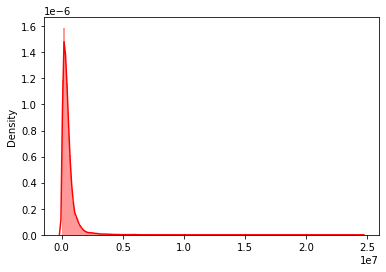

In [ ]:
import seaborn as sns 
sns.set_palette ("hls") # Установить цвет всех картинок, использовать цветовое пространство hls
sns.distplot(y_train,color="r",bins=200,kde=True)
plt.show()



логонормальное, берем логарифм

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


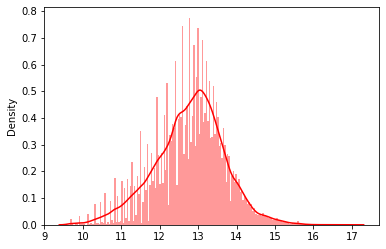

In [ ]:
y_train_scaled=np.log(y_train)
sns.set_palette ("hls") # Установить цвет всех картинок, использовать цветовое пространство hls
sns.distplot(y_train_scaled,color="r",bins=200,kde=True)
plt.show()

Стало нормальное

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


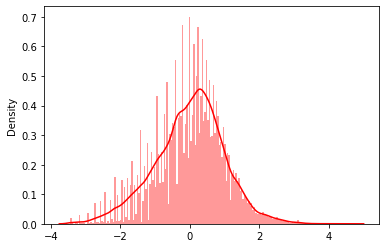

In [ ]:
# Для нормализации данных используется готовый инструмент
y_scaler = StandardScaler()

# Нормализация выходных данных по стандартному нормальному распределению
y_train_scaled = y_scaler.fit_transform(y_train_scaled.reshape(-1, 1))
sns.set_palette ("hls") # Установить цвет всех картинок, использовать цветовое пространство hls
sns.distplot(y_train_scaled,color="r",bins=200,kde=True)
plt.show()

In [ ]:
# Функция оценки результатов и вывода оценки
# Добавил обратный перевод из нормального в логонормальное

def eval_net(model, x_train, y_train, y_scaler = None, n = 10, limit = 7000000.):
  
    pred = model.predict(x_train)             # Предсказание на тренировочной выборке
    if y_scaler:                              # Если есть нормирование - то денормировать
        pred = y_scaler.inverse_transform(pred)
        y_source=y_scaler.inverse_transform(y_train)
    else:
      y_source=y_train
    #print(np.power(2.719,pred[:,0]).shape)


    MAEPr=(np.abs(np.power(2.719,y_source[:,0])-np.power(2.719,pred[:,0]))/np.power(2.719,y_source[:,0])*100)
    MAEPr_mean=np.sum(MAEPr)/MAEPr.shape[0]
    #print(MAEPr.shape)
    print('Средняя абсолютная ошибка:', mean_absolute_error(np.power(2.719,pred[:,0]), np.power(2.719,y_source[:,0])), '\n')
    print('Средняя абсолютная ошибка%:',MAEPr_mean, '\n')

    for i in range(n):
        print('Реальное значение: {:6.2f}  Предсказанное значение: {:6.2f}  Разница: {:6.2f}'.format(np.power(2.719,y_source[i,0]),
                                                                                                    np.power(2.719,pred[i,0]),
                                                                                                    abs(np.power(2.719,y_source[i,0]) - np.power(2.719,pred[i,0]))))
    # Построение картинки разброса предсказанных и верных значений зарплаты
    fig, ax = plt.subplots(figsize=(6, 6))
    ax.scatter(np.power(2.719,y_source[:,0]),np.power(2.719,pred[:,0]))                 # Отрисовка точечного графика
    ax.set_xlim(0, limit)                     # Пределы по x, y
    ax.set_ylim(0, limit)
    ax.plot(plt.xlim(), plt.ylim(), 'r')      # Отрисовка диагональной линии
    plt.xlabel('Правильные значения')
    plt.ylabel('Предсказания')
    plt.grid()
    plt.show()        

In [ ]:
splitVal = 0.05
mask_list = np.random.sample(x_train_01.shape[0])
ValMask=mask_list < splitVal 
TestMask=np.logical_and(mask_list < splitVal*2,mask_list >= splitVal)


In [ ]:
x_test_01=x_train_01[TestMask]
y_test_scaled=y_train_scaled[TestMask]
x_val_01=x_train_01[ValMask]
y_val_scaled=y_train_scaled[ValMask]

x_train_01=x_train_01[np.logical_and(~TestMask,~ValMask)]
y_train_scaled=y_train_scaled[np.logical_and(~TestMask,~ValMask)]
print(x_train_01.shape,x_test_01.shape,x_val_01.shape)
print(y_train_scaled.shape,y_test_scaled.shape,y_val_scaled.shape)

(63166, 101) (3466, 101) (3487, 101)
(63166, 1) (3466, 1) (3487, 1)


In [ ]:
# Обучение модели на простых данных с нормализованной ценой
model_simple = Sequential()
model_simple.add(BatchNormalization(input_dim=x_train_01.shape[1]))
model_simple.add(Dense(128, activation='relu'))
model_simple.add(Dense(1000, activation='tanh'))
model_simple.add(Dense(200, activation='relu'))
model_simple.add(Dense(1, activation='linear'))

model_simple.compile(optimizer=Adam(learning_rate=1e-5), loss='mse', metrics=['mae'])

history = model_simple.fit(x_train_01, 
                    y_train_scaled, 
                    epochs=100, 
                    batch_size=256,
                    validation_data=(x_val_01,y_val_scaled), 
                    verbose=1)
print(model_simple.evaluate(x_test_01,y_test_scaled))

Epoch 1/100
247/247 [==============================] - 5s 18ms/step - loss: 0.5427 - mae: 0.5430 - val_loss: 0.3672 - val_mae: 0.4468
Epoch 2/100
247/247 [==============================] - 4s 17ms/step - loss: 0.2466 - mae: 0.3605 - val_loss: 0.2016 - val_mae: 0.3222
Epoch 3/100
247/247 [==============================] - 4s 16ms/step - loss: 0.2053 - mae: 0.3264 - val_loss: 0.1661 - val_mae: 0.2963
Epoch 4/100
247/247 [==============================] - 4s 16ms/step - loss: 0.1857 - mae: 0.3090 - val_loss: 0.1534 - val_mae: 0.2819
Epoch 5/100
247/247 [==============================] - 4s 16ms/step - loss: 0.1756 - mae: 0.2990 - val_loss: 0.1457 - val_mae: 0.2731
Epoch 6/100
247/247 [==============================] - 4s 17ms/step - loss: 0.1680 - mae: 0.2903 - val_loss: 0.1392 - val_mae: 0.2652
Epoch 7/100
247/247 [==============================] - 4s 16ms/step - loss: 0.1610 - mae: 0.2840 - val_loss: 0.1340 - val_mae: 0.2588
Epoch 8/100
247/247 [==============================] - 4s 16ms

In [ ]:
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)

Mounted at /content/drive/


In [ ]:
model.save('/content/drive/MyDrive/NN/passenger.h5')

In [ ]:
print(model_simple.evaluate(x_test_01,y_test_scaled))

109/109 [==============================] - 0s 2ms/step - loss: 0.0985 - mae: 0.2117
[0.09846840053796768, 0.21166616678237915]


Средняя абсолютная ошибка: 75733.3324197043 

Средняя абсолютная ошибка%: 19.75722911472348 

Реальное значение: 999640.57  Предсказанное значение: 1154158.32  Разница: 154517.75
Реальное значение: 140639.60  Предсказанное значение: 155851.58  Разница: 15211.98
Реальное значение: 752684.99  Предсказанное значение: 709247.48  Разница: 43437.51
Реальное значение: 973538.73  Предсказанное значение: 1127071.19  Разница: 153532.46
Реальное значение: 988597.46  Предсказанное значение: 1101086.04  Разница: 112488.58
Реальное значение: 591070.88  Предсказанное значение: 591462.87  Разница: 391.99
Реальное значение: 1324923.42  Предсказанное значение: 1315450.83  Разница: 9472.59
Реальное значение: 270893.47  Предсказанное значение: 329698.90  Разница: 58805.42
Реальное значение: 290965.15  Предсказанное значение: 196168.12  Разница: 94797.03
Реальное значение: 295983.13  Предсказанное значение: 278479.75  Разница: 17503.38


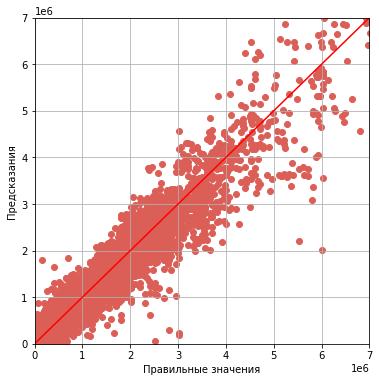

Средняя абсолютная ошибка: 82646.60142181502 

Средняя абсолютная ошибка%: 20.010864634286392 

Реальное значение: 205663.42  Предсказанное значение: 152913.05  Разница: 52750.36
Реальное значение: 165524.48  Предсказанное значение: 114391.41  Разница: 51133.07
Реальное значение: 260857.78  Предсказанное значение: 261776.69  Разница: 918.91
Реальное значение: 65190.57  Предсказанное значение: 144935.30  Разница: 79744.73
Реальное значение: 421439.04  Предсказанное значение: 407488.02  Разница: 13951.02
Реальное значение: 401365.34  Предсказанное значение: 415258.48  Разница: 13893.15
Реальное значение: 471624.36  Предсказанное значение: 586955.15  Разница: 115330.79
Реальное значение: 250822.19  Предсказанное значение: 253758.82  Разница: 2936.63
Реальное значение: 331109.58  Предсказанное значение: 414747.00  Разница: 83637.43
Реальное значение: 732608.15  Предсказанное значение: 701174.26  Разница: 31433.89


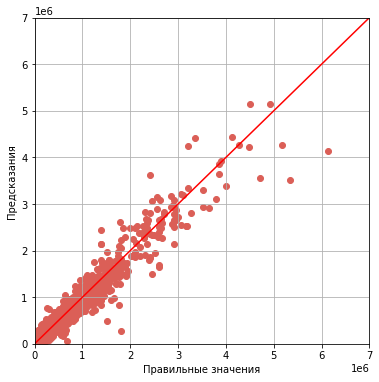

In [ ]:
eval_net(model_simple, x_train_01, y_train_scaled,y_scaler)
eval_net(model_simple, x_test_01, y_test_scaled,y_scaler)

In [ ]:
# Функция извлечения описания

def extract_description_text(row_list):
    result = []
    
    for row in row_list:
        if np.array(row[PriceKey]) > 0:
            result.append(str(row[ModelKey]))
    
    # Возврат в виде массива
    return result

In [ ]:
def purify(x):
    if isinstance(x, str):                # Если значение - строка:
        # Замена концов строк на пробелы, удаление символа с кодом 0xA0,
        # обрезка краевых пробелов и приведение к нижнему регистру
        x = x.replace('\n', ' ').replace('\xa0', '').strip().lower()
    return x

In [ ]:
# Извлечение текстов описания для выборки
description_text = extract_description_text(df.values) 

# Пример текста описания из резюме
print(df.values[120:123])

[['lancer ix [рестайлинг]' 250000 2006 150000 'седан' 'механика' 'бензин'
  1.6 98.0]
 ['gl-класс x164' 1000000 2008 190000 'внедорожник' 'автомат' 'бензин'
  3.5 389.0]
 ['5 серия 523 e39' 80000 1995 368000 'седан' 'автомат' 'бензин' 2.5
  170.0]]


In [ ]:
# Преобразование текстовых данных в числовые/векторные для обучения нейросетью

# Используется встроенный в Keras токенизатор для разбиения текста и построения частотного словаря
tokenizer = Tokenizer(num_words=3000, # объем словаря
                      filters='!"#$%&()*+,-–—./:;<=>?@[\\]^_`{|}~\t\n\xa0', # убираемые из текста ненужные символы 
                      lower=True, # приведение слов к нижнему регистру
                      split=' ', # разделитель слов
                      oov_token='unknown', # указание разделять по словам, а не по единичным символам
                      char_level=False # токен для слов, которые не вошли в словарь
                      )

tokenizer.fit_on_texts(description_text) 

In [ ]:
items = list(tokenizer.word_index.items())       # Получение индексов слов
print(items[:50])                                # Посмотр 50 самых часто встречающихся слов
print("Размер словаря", len(items))              # Длина словаря

[('unknown', 1), ('поколение', 2), ('рестайлинг', 3), ('1', 4), ('2', 5), ('3', 6), ('класс', 7), ('5', 8), ('серия', 9), ('focus', 10), ('astra', 11), ('nexia', 12), ('й', 13), ('4', 14), ('6', 15), ('octavia', 16), ('rio', 17), ('e', 18), ('lancer', 19), ('solaris', 20), ('logan', 21), ('h', 22), ('matiz', 23), ('passat', 24), ('7', 25), ('m150', 26), ('c', 27), ('niva', 28), ('family', 29), ('a6', 30), ('x', 31), ('a4', 32), ('200', 33), ('polo', 34), ('pajero', 35), ('cx', 36), ('cruze', 37), ('grand', 38), ('j300', 39), ('ix', 40), ('sportage', 41), ('s', 42), ('lacetti', 43), ('corolla', 44), ('duster', 45), ('x5', 46), ('outlander', 47), ('a', 48), ('308', 49), ('b3', 50)]
Размер словаря 1454


In [ ]:
# Преобразование текстов в последовательность индексов согласно частотному словарю
description_seq = tokenizer.texts_to_sequences(description_text)

In [ ]:
# Преобразование последовательностей индексов в bag of words
x_train_description_01 = tokenizer.sequences_to_matrix(description_seq)

In [ ]:
#description_seq_train=description_seq[np.logical_and(~TestMask,~ValMask)]
#description_seq_test=description_seq[TestMask]
#description_seq_val=description_seq[ValMask]
x_test_description_01=x_train_description_01[TestMask]
x_val_description_01=x_train_description_01[ValMask]
x_train_description_01=x_train_description_01[np.logical_and(~TestMask,~ValMask)]
#print(description_seq_train.shape,description_seq_test.shape,description_seq_val.shape)
print(x_train_description_01.shape,x_test_description_01.shape,x_val_description_01.shape)

(63166, 3000) (3466, 3000) (3487, 3000)


In [ ]:
# Освобождение памяти от ненужных более объектов
del description_text,description_seq, tokenizer

In [ ]:
# Обучение модели на описании

model_description = Sequential()
model_description.add(Dense(200, activation='relu', input_dim=x_train_description_01.shape[1]))
model_description.add(Dense(500, activation='relu'))
model_description.add(Dense(1, activation='linear'))

model_description.compile(optimizer=Adagrad(learning_rate=1e-3), loss='mse', metrics=['mae'])

history = model_description.fit(x_train_description_01, 
                    y_train_scaled, 
                    batch_size=256,
                    epochs=200, 
                    validation_data=(x_test_description_01,y_test_scaled), 
                    verbose=1)



Epoch 1/200
247/247 [==============================] - 5s 21ms/step - loss: 0.9873 - mae: 0.7748 - val_loss: 0.9651 - val_mae: 0.7636
Epoch 2/200
247/247 [==============================] - 5s 20ms/step - loss: 0.9700 - mae: 0.7675 - val_loss: 0.9474 - val_mae: 0.7560
Epoch 3/200
247/247 [==============================] - 5s 20ms/step - loss: 0.9517 - mae: 0.7592 - val_loss: 0.9274 - val_mae: 0.7469
Epoch 4/200
247/247 [==============================] - 5s 20ms/step - loss: 0.9304 - mae: 0.7493 - val_loss: 0.9038 - val_mae: 0.7355
Epoch 5/200
247/247 [==============================] - 5s 20ms/step - loss: 0.9053 - mae: 0.7372 - val_loss: 0.8762 - val_mae: 0.7220
Epoch 6/200
247/247 [==============================] - 5s 20ms/step - loss: 0.8762 - mae: 0.7228 - val_loss: 0.8447 - val_mae: 0.7063
Epoch 7/200
247/247 [==============================] - 5s 20ms/step - loss: 0.8435 - mae: 0.7061 - val_loss: 0.8103 - val_mae: 0.6889
Epoch 8/200
247/247 [==============================] - 5s 20ms

Средняя абсолютная ошибка: 92034.5364426189 

Средняя абсолютная ошибка%: 23.213292030615246 

Реальное значение: 999640.57  Предсказанное значение: 602835.88  Разница: 396804.68
Реальное значение: 140639.60  Предсказанное значение: 137506.18  Разница: 3133.41
Реальное значение: 752684.99  Предсказанное значение: 536783.12  Разница: 215901.86
Реальное значение: 973538.73  Предсказанное значение: 913492.74  Разница: 60045.99
Реальное значение: 205663.42  Предсказанное значение: 252846.90  Разница: 47183.48
Реальное значение: 988597.46  Предсказанное значение: 975179.23  Разница: 13418.23
Реальное значение: 591070.88  Предсказанное значение: 608977.56  Разница: 17906.68
Реальное значение: 1324923.42  Предсказанное значение: 897340.24  Разница: 427583.18
Реальное значение: 270893.47  Предсказанное значение: 389758.41  Разница: 118864.94
Реальное значение: 290965.15  Предсказанное значение: 252453.09  Разница: 38512.06


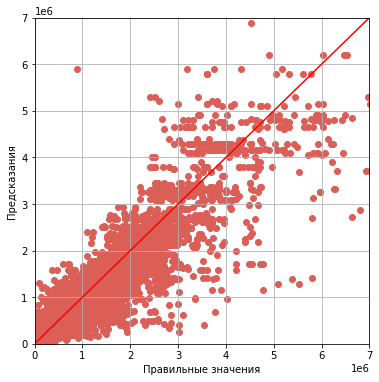

In [ ]:
eval_net(model_description, x_train_description_01, y_train_scaled,y_scaler)

In [ ]:
input1 = Input((x_train_01.shape[1],))
input2 = Input((x_train_description_01.shape[1],))

x1 = input1                               # Ветка 1
x1 = Dense(128, activation="relu")(x1)
x1 = Dense(1000, activation="tanh")(x1)
x1 = Dense(200, activation="relu")(x1)

x2 = input2                               # Ветка 2
x2 = Dense(200, activation="relu")(x2)
x2 = Dense(500, activation="relu")(x2)
#x2 = Dropout(0.3)(x2)

x = concatenate([x1, x2])             # Объединение веток

x = Dropout(0.3)(x)
x = Dense(30, activation='relu')(x)       # Промежуточный слой
x = Dropout(0.5)(x)
x = Dense(1, activation='linear')(x)      # Финальный регрессирующий нейрон

# В Model передаются входы и выход
model_final = Model((input1, input2), x)

model_final.compile(optimizer=Adam(learning_rate=3e-4), loss='mse', metrics=['mae'])

history = model_final.fit([x_train_01, x_train_description_01],y_train_scaled,batch_size=256,epochs=150,validation_data=([x_test_01, x_test_description_01],y_test_scaled),verbose=1)

Epoch 1/150
247/247 [==============================] - 10s 40ms/step - loss: 0.7106 - mae: 0.6155 - val_loss: 0.1869 - val_mae: 0.3001
Epoch 2/150
247/247 [==============================] - 10s 39ms/step - loss: 0.2180 - mae: 0.3280 - val_loss: 0.1343 - val_mae: 0.2544
Epoch 3/150
247/247 [==============================] - 10s 39ms/step - loss: 0.1915 - mae: 0.3079 - val_loss: 0.1250 - val_mae: 0.2411
Epoch 4/150
247/247 [==============================] - 10s 39ms/step - loss: 0.1841 - mae: 0.3027 - val_loss: 0.1275 - val_mae: 0.2481
Epoch 5/150
247/247 [==============================] - 10s 39ms/step - loss: 0.1803 - mae: 0.2995 - val_loss: 0.1247 - val_mae: 0.2404
Epoch 6/150
247/247 [==============================] - 10s 39ms/step - loss: 0.1757 - mae: 0.2956 - val_loss: 0.1218 - val_mae: 0.2380
Epoch 7/150
247/247 [==============================] - 10s 39ms/step - loss: 0.1760 - mae: 0.2951 - val_loss: 0.1206 - val_mae: 0.2366
Epoch 8/150
247/247 [==============================] - 

Средняя абсолютная ошибка: 91075.1470046586 

Средняя абсолютная ошибка%: 22.4861862918264 

Реальное значение: 999640.57  Предсказанное значение: 800052.84  Разница: 199587.73
Реальное значение: 140639.60  Предсказанное значение: 147526.04  Разница: 6886.45
Реальное значение: 752684.99  Предсказанное значение: 516530.69  Разница: 236154.30
Реальное значение: 973538.73  Предсказанное значение: 822466.12  Разница: 151072.61
Реальное значение: 988597.46  Предсказанное значение: 862939.13  Разница: 125658.33
Реальное значение: 591070.88  Предсказанное значение: 571844.51  Разница: 19226.37
Реальное значение: 1324923.42  Предсказанное значение: 838435.36  Разница: 486488.06
Реальное значение: 270893.47  Предсказанное значение: 355516.77  Разница: 84623.29
Реальное значение: 290965.15  Предсказанное значение: 247019.75  Разница: 43945.40
Реальное значение: 295983.13  Предсказанное значение: 335596.16  Разница: 39613.03


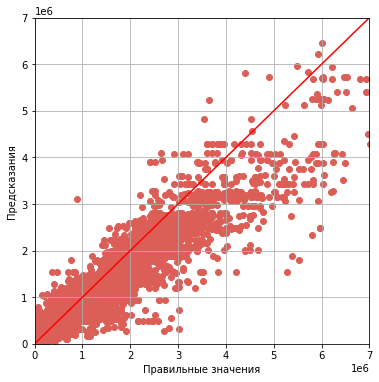

In [ ]:
eval_net(model_final, [x_train_01, x_train_description_01], y_train_scaled,y_scaler)

Средняя абсолютная ошибка: 91743.1281890184 

Средняя абсолютная ошибка%: 23.228727155030786 

Реальное значение: 501736.25  Предсказанное значение: 420273.77  Разница: 81462.47
Реальное значение: 220716.08  Предсказанное значение: 205674.42  Разница: 15041.66
Реальное значение: 540882.41  Предсказанное значение: 454473.99  Разница: 86408.41
Реальное значение: 707512.32  Предсказанное значение: 635569.90  Разница: 71942.42
Реальное значение: 200645.93  Предсказанное значение: 295396.64  Разница: 94750.71
Реальное значение: 561961.42  Предсказанное значение: 592056.72  Разница: 30095.30
Реальное значение: 311037.19  Предсказанное значение: 258866.32  Разница: 52170.87
Реальное значение: 235769.01  Предсказанное значение: 259023.43  Разница: 23254.42
Реальное значение: 110337.83  Предсказанное значение: 125273.68  Разница: 14935.85
Реальное значение: 316055.26  Предсказанное значение: 341596.95  Разница: 25541.69


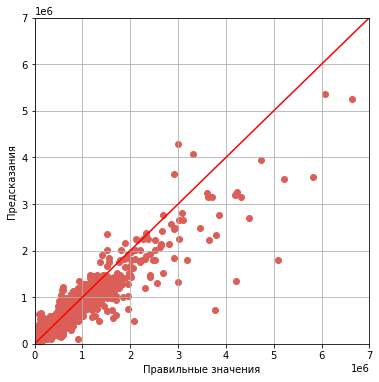

In [ ]:
eval_net(model_final, [x_val_01, x_val_description_01], y_val_scaled,y_scaler)